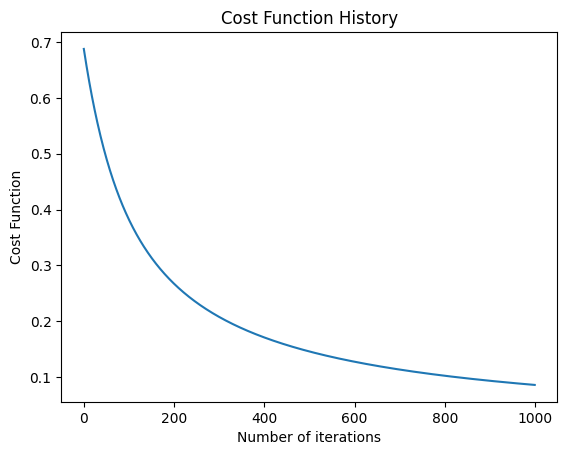

Trained theta values:
[-0.9559056  -0.59749767  0.89693308 -1.01621414 -0.9447418 ]
Accuracy on test set: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = (iris.target == 0).astype(int)  # Convert to binary (Setosa vs. Not Setosa)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to X for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Logistic Regression Implementation
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + (lambda_ / (2*m)) * np.sum(np.square(theta[1:]))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations, lambda_):
    m = len(y)
    J_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        gradient[1:] += (lambda_ / m) * theta[1:]  # Regularization term

        theta -= alpha * gradient
        J_history[i] = compute_cost(X, y, theta, lambda_)

    return theta, J_history

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations
lambda_ = 0.01  # Regularization parameter

# Train the logistic regression model
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iterations, lambda_)

# Plot the cost function history
plt.plot(range(num_iterations), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function History')
plt.show()

# Display the learned parameters (theta values)
print("Trained theta values:")
print(theta)

# Make predictions on the test set
h_test = sigmoid(X_test.dot(theta))
y_pred = (h_test >= 0.5).astype(int)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f'Accuracy on test set: {accuracy:.2f}%')
